In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1024 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['Lumpy Skin', 'Normal Skin']

In [6]:
train_size = 0.8
len(dataset)*train_size

25.6

In [7]:
train_ds = dataset.take(25)
len(train_ds)

25

In [8]:
test_ds = dataset.skip(25)
len(test_ds)

7

In [9]:
val_size=0.1
len(dataset)*val_size

3.2

In [10]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [11]:
test_ds = test_ds.skip(3)
len(test_ds)

4

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=32,
)

Epoch 1/32
25/25 [==============================] - 46s 2s/step - loss: 0.6373 - accuracy: 0.6625 - val_loss: 0.5050 - val_accuracy: 0.7917
Epoch 2/32
25/25 [==============================] - 38s 2s/step - loss: 0.5400 - accuracy: 0.6888 - val_loss: 0.4615 - val_accuracy: 0.8229
Epoch 3/32
25/25 [==============================] - 40s 2s/step - loss: 0.5277 - accuracy: 0.7262 - val_loss: 0.4932 - val_accuracy: 0.8125
Epoch 4/32
25/25 [==============================] - 37s 1s/step - loss: 0.5272 - accuracy: 0.7600 - val_loss: 0.5772 - val_accuracy: 0.7188
Epoch 5/32
25/25 [==============================] - 35s 1s/step - loss: 0.5232 - accuracy: 0.7412 - val_loss: 0.4303 - val_accuracy: 0.7500
Epoch 6/32
25/25 [==============================] - 34s 1s/step - loss: 0.4809 - accuracy: 0.7775 - val_loss: 0.3911 - val_accuracy: 0.8229
Epoch 7/32
25/25 [==============================] - 34s 1s/step - loss: 0.4611 - accuracy: 0.7987 - val_loss: 0.3975 - val_accuracy: 0.8333
Epoch 8/32
25/25 [==

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


NameError: name 'history' is not defined

first image to predict
actual label: Normal Skin
1/1 [==============================] - 1s 1s/step
predicted label: Lumpy Skin


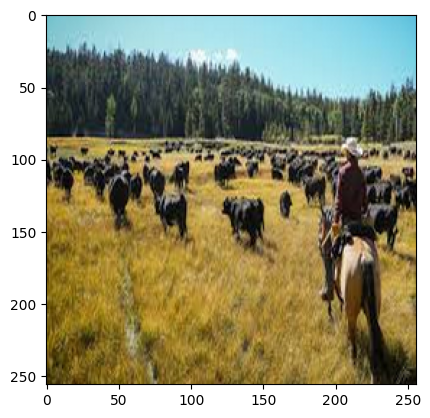

In [18]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[30].numpy().astype('uint8')
    first_label = labels_batch[30].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

NameError: name 'predict' is not defined

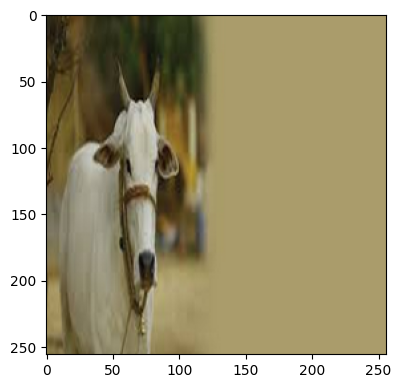

In [19]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [20]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
